# Clustering Filipino Households Based on Income and Spending Patterns Using K-Means (FIES Dataset)
---
## 1. Problem Definition
This study aims to identify clusters of Filipino households based on income and expenditure patterns using the FIES dataset. K-Means clustering will be applied to discover hidden socio-economic segments, helping reveal types of household spending behaviors in the Philippines.


### Objectives
- Group households into clusters based on spending patterns
- Find natural segments in income and expenditure
- Identify household spending behavior types
- Discover clusters of families with similar priority expenses

---
## 2. Data Collection
Description and Discussion

# 1. Background of the Study

## Title of the Study
### **Clustering Filipino Households Based on Income and Spending Patterns Using K-Means (FIES Dataset)**

***

## Source of Data
| Attribute | Details |
| :--- | :--- |
| **Dataset Name** | Family Income and Expenditure Survey (FIES) — Philippines |
| **Primary Source** | Philippine Statistics Authority (PSA) |
| **Acquisition Source** | Kaggle — Family Income and Expenditure Dataset |

***

## Brief Description of the Dataset
The dataset provides detailed information on Filipino households’ **annual income**, **sources of earnings**, and comprehensive **patterns of expenditure**. It contains both quantitative (numerical) and categorical features that describe the household’s socio-economic profile.

* **Number of Rows and Columns:** 41544 rows and 60 columns
* **Sample Variables:**
    * `Region` – geographic region of the household (Categorical)
    * `Household_Head_Age` – age of the family head (Quantitative)
    * `Education` – highest educational attainment (Categorical/Ordinal)
    * `Family_Size` – total number of family members (Quantitative)
    * `Total_Income` – total annual family income (Quantitative)
    * `Food_Expenditure`, `Education_Expenditure`, `Housing_Expenditure`, etc. – detailed spending categories (Quantitative)

***

## Machine Learning Task Details

### Selected Features (Independent Variables)
**to be done...**

### Target / Label Column (Dependent Variable)
**to be done...**



### Objective of the Study
This study aims to identify clusters of Filipino households based on income and expenditure patterns using the FIES dataset. K-Means clustering will be applied to discover hidden socio-economic segments, helping reveal types of household spending behaviors in the Philippines.

---
# 2. Data Collection / Loading
The dataset used in this study is the Family Income and Expenditure Survey (FIES), publicly available on Kaggle. It contains socio-economic and spending data of Filipino households, based on surveys originally conducted by the Philippine Statistics Authority (PSA). The data is stored in a CSV file format (Family Income and Expenditure.csv) and is imported using the pandas library for data analysis and manipulation.

In [153]:
# Importing necessary libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Family Income and Expenditure.csv")

In [154]:
# rows and columns of the dataframe
df.shape

(41544, 60)

In [155]:
# displaying the first few rows of the dataframe 
pd.set_option('display.max_columns', None)
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,an

---
# 3. Data Information and Summary Statistics
This section provides an overview of the dataset's structure, data types, and the initial statistical distribution of the variables, which is crucial for identifying necessary preprocessing and cleaning steps

In [156]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [157]:
df.shape

(41544, 60)

In [158]:
# check dataframe shape if have null values
df.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [159]:
df.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Age,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,House Floor Area,House Age,Number of bedrooms,Electricity,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,4.154400e+04,4.154400e+04,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,4.154400e+04,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,1085.068121,2294.736183,4954.621076,3.837547e+04,2.092154e+04,7.160231e+03,11806.344454,4095.492057,7473.500481,12522.071635,5265.726001,1.381686e+04,5.437624e+04,51.381451,4.635182,0.410216,1.362579,1.272699,55.603360,20.125505,1.788008,0.890815,0.856875,0.435225,0.162141,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,2174.431913,3998.977131,7496.500945,5.311168e+04,3.937152e+04,2.690200e+04,19351.213715,7298.822614,21219.170907,17547.027921,13279.593681,4.764378e+04,1.471428e+05,14.166081,2.280252,0.694390,1.408000,1.149152,55.023165,14.295452,1.105664,0.311875,0.646306,0.560125,0.389108,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.950000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,9.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,0.000000,0.000000,1365.000000,1.308000e+04,6.000000e+03,3.000000e+02,2412.000000,564.000000,0.000000,3792.000000,0.000000,0.000000e+00,0.000000e+00,41.000000,3.000000,0.000000,0.000000,0.000000,25.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,270.000000,300.000000,2740.000000,2.299200e+04,1.080000e+04,1.125000e+03,6036.000000,1506.000000,880.000000,6804.000000,1

## Findings:
- The dataset contains 41,544 rows (representing individual families/households) and 60 columns (features). 
- A check for null values across the entire dataset revealed zero missing entries (as confirmed by the count row being uniform across all columns) except for Household Head Occupation that has 7,536 missing values.
- the data is complete but exhibits high skewness and large differences in feature scales. The next steps in data cleaning and pre-processing must focus on handling the income skew and scaling all numerical features.



---
# 4. Data Cleaning
This section addresses inconsistencies and prepares the raw features for the subsequent Data Engineering steps.

### 4.1 Dropping Unneeded Columns
This process involves permanently removing columns from the DataFrame that are redundant, irrelevant, or potentially harmful to the modeling process.

In [160]:
# list all the columns in the dataframe
pd.DataFrame({'Column Names': df.columns})

,Column Names
0,Total Household Income
1,Region
2,Total Food Expenditure
3,Main Source of Income
4,Agricultural Household indicator
5,Bread and Cereals Expenditure
6,Total Rice Expenditure
7,Meat Expenditure
8,Total Fish and marine products Expenditure
9,Fruit Expenditure


In [161]:
# drop unnecessary columns

df.drop(columns=[
    # Detailed Expenditures (Kept the aggregate 'Total Food Expenditure' instead)
    'Bread and Cereals Expenditure',
    'Total Rice Expenditure',
    'Meat Expenditure',
    'Total Fish and  marine products Expenditure',
    'Fruit Expenditure',
    'Vegetables Expenditure',

    # Features with High Missing Data or High Cardinality
    'Household Head Occupation',
    'Household Head Class of Worker',

    # Redundant, Low-Variance, or Noisy Features
    'Agricultural Household indicator',
    'Crop Farming and Gardening expenses',
    'Clothing, Footwear and Other Wear Expenditure',
    'House Age',
    'Type of Roof',
    'Type of Walls',
    'Toilet Facilities',
    'Electricity',
    'Main Source of Water Supply',

    # Obsolete or Low-Differential Assets
    'Number of Television', # Dropping this as it's low-variance
    'Number of CD/VCD/DVD',
    'Number of Component/Stereo set',
    'Number of Landline/wireless telephones',
    'Number of Motorized Banca'  # Very niche/low frequency asset
], inplace=True)

# list all the columns in the dataframe after dropping unneeded columns
pd.DataFrame({
    'Column': df.columns,
    'Type': df.dtypes.values
})

,Column,Type
0,Total Household Income,int64
1,Region,object
2,Total Food Expenditure,int64
3,Main Source of Income,object
4,Restaurant and hotels Expenditure,int64
5,Alcoholic Beverages Expenditure,int64
6,Tobacco Expenditure,int64
7,Housing and water Expenditure,int64
8,Imputed House Rental Value,int64
9,Medical Care Expenditure,int64


## Summary:
- Dropped the original 22 noisy/redundant/detailed columns to ensure the model learns from the predictors and not the answer itself and prevents multicollinearity.
- inputs that have a lot of missing data are dropped.
- All rows have inputs and is not null.



---
# 5. Data Engineering / pre-processing
This section transform the cleaned, consistent data into a format that machine learning algorithms can efficiently process. It is primarily focused on making the features mathematically and statistically suitable for modeling.

## 5.1 Feature Encoding (Handling Categorical Data)
Machine learning models only understand numbers, so any text-based (categorical) data must be converted into numerical representations. The goal of this phase was to transform the cleaned dataset, which contained a mix of numerical and categorical variables, into a purely numerical matrix that K-Means clustering could process. Since K-Means is a distance-based algorithm, features must be represented numerically to ensure accurate distance calculations.

In [162]:
# check all object type columns
df.dtypes[df.dtypes == 'object']

Region                                      object
Main Source of Income                       object
Household Head Sex                          object
Household Head Marital Status               object
Household Head Highest Grade Completed      object
Household Head Job or Business Indicator    object
Type of Household                           object
Type of Building/House                      object
Tenure Status                               object
dtype: object

In [163]:
# check first 5 rows of object type columns
df.select_dtypes(include=['object']).head()

,Region,Main Source of Income,Household Head Sex,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Type of Household,Type of Building/House,Tenure Status
0,CAR,Wage/Salaries,Female,Single,Teacher Training and Education Sciences Programs,With Job/Business,Extended Family,Single house,Own or owner-like possession of house and lot
1,CAR,Wage/Salaries,Male,Married,Transport Services Programs,With Job/Business,Single Family,Single house,Own or owner-like possession of house and lot
2,CAR,Wage/Salaries,Male,Married,Grade 3,With Job/Business,Single Family,Single house,Own or owner-like possession of house and lot
3,CAR,Wage/Salaries,Male,Married,Elementary Graduate,With Job/Business,Single Family,Single house,Own or owner-like possession of house and lot
4,CAR,Wage/Salaries,Male,Married,Elementary Graduate,With Job/Business,Single Family,Single house,Own or owner-like possession of house and lot


In [164]:
# For specific columns
columns_to_check = ['Region', 'Main Source of Income','Household Head Sex', 
                    'Household Head Marital Status', 'Household Head Highest Grade Completed',
                    'Type of Household', 'Type of Building/House', 'Tenure Status']

for col in columns_to_check:
    print(f"\n{col}:")
    print(df[col].unique())


Region:
['CAR' 'Caraga' 'VI - Western Visayas' 'V - Bicol Region' ' ARMM'
 'III - Central Luzon' 'II - Cagayan Valley' 'IVA - CALABARZON'
 'VII - Central Visayas' 'X - Northern Mindanao' 'XI - Davao Region'
 'VIII - Eastern Visayas' 'I - Ilocos Region' 'NCR' 'IVB - MIMAROPA'
 'XII - SOCCSKSARGEN' 'IX - Zasmboanga Peninsula']

Main Source of Income:
['Wage/Salaries' 'Other sources of Income' 'Enterpreneurial Activities']

Household Head Sex:
['Female' 'Male']

Household Head Marital Status:
['Single' 'Married' 'Widowed' 'Divorced/Separated' 'Annulled' 'Unknown']

Household Head Highest Grade Completed:
['Teacher Training and Education Sciences Programs'
 'Transport Services Programs' 'Grade 3' 'Elementary Graduate'
 'Second Year High School' 'Third Year High School'
 'Business and Administration Programs' 'First Year College'
 'High School Graduate'
 'Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or 

In [165]:
# print the count of unique values in each column
df_to_check_without_int_col = df.select_dtypes(exclude=['int64', 'float64'])

for col in columns_to_check:
    unique_counts = df_to_check_without_int_col.nunique()

print("\nUnique value counts for categorical columns:\n")
print(unique_counts)


Unique value counts for categorical columns:

Region                                      17
Main Source of Income                        3
Household Head Sex                           2
Household Head Marital Status                6
Household Head Highest Grade Completed      46
Household Head Job or Business Indicator     2
Type of Household                            3
Type of Building/House                       6
Tenure Status                                8
dtype: int64


## Findings:
- columns that has low cardinality (Region, Main Source of Income, etc.) can be encode using **one-hot encoding** and **binary-encoding** (Male = 0, Female = 1)
- columns with too many cardinality like **Household Head Highest Grade Completed** needs to be encoded in different way

---

## 5.1.1 One-hot Encoding and Binary Encoding Columns
To prepare the dataset for machine learning, categorical variables must be converted into numerical form so that the Random Forest Classifier can interpret them effectively. Two encoding techniques were used in this study — **One-Hot Encoding and Binary Encoding** — depending on the number of unique categories in each column.

- **One-hot encoding** - was applied to categorical features with a small number of unique values.
- **Binary encoding** - was used for features containing only two categories.

In [166]:
print(f"Original shape: {df.shape}")

# List of columns to one-hot encode
categorical_columns = [
    'Region',
    'Main Source of Income',
    'Household Head Marital Status',
    'Type of Building/House',
    'Tenure Status',
    'Type of Household',
    'Household Head Job or Business Indicator'
]

# One-hot encode the categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

from sklearn.preprocessing import LabelEncoder

# Encode Sex column (Female = 0, Male = 1)
le = LabelEncoder()
df['Household Head Sex'] = le.fit_transform(df['Household Head Sex'])


# Display the shape before and after encoding

print(f"Encoded shape: {df.shape}")

df.head(3)

Original shape: (41544, 38)
Encoded shape: (41544, 76)


,Total Household Income,Total Food Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Highest Grade Completed,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,House Floor Area,Number of bedrooms,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorcycle/Tricycle,Region_ ARMM,Region_CAR,Region_Caraga,Region_I - Ilocos Region,Region_II - Cagayan Valley,Region_III - Central Luzon,Region_IVA - CALABARZON,Region_IVB - MIMAROPA,Region_IX - Zasmboanga Peninsula,Region_NCR,Region_V - Bicol Region,Region_VI - Western Visayas,Region_VII - Central Visayas,Region_VIII - Eastern Visayas,Region_X - Northern Mindanao,Region_XI - Davao Region,Region_XII - SOCCSKSARGEN,Main Source of Income_Enterpreneurial Activities,Main Source of Income_Other sources of Income,Main Source of Income_Wage/Salaries,Household Head Marital Status_Annulled,Household Head Marital Status_Divorced/Separated,Household Head Marital Status_Married,Household Head Marital Status_Single,Household Head Marital Status_Unknown,Household Head Marital Status_Widowed,Type of Building/House_Commercial/industrial/agricultural building,Type of Building/House_Duplex,Type of Building/House_Institutional living quarter,Type of Building/House_Multi-unit residential,"Type of Building/House_Other building unit (e.g. cave, boat)",Type of Building/House_Single house,Tenure Status_Not Applicable,"Tenure Status_Own house, rent lot","Tenure Status_Own house, rent-free lot with consent of owner","Tenure Status_Own house, rent-free lot without consent of owner",Tenure Status_Own or owner-like possession of house and lot,Tenure Status_Rent house/room including lot,Tenure Status_Rent-free house and lot with consent of owner,Tenure Status_Rent-free house and lot without consent of owner,Type of Household_Extended Family,Type of Household_Single Family,Type of Household_Two or More Nonrelated Persons/Members,Household Head Job or Business Indicator_No Job/Business,Household Head Job or Business Indicator_With Job/Business
0,480332,117848,3000,0,0,63636,30000,3457,4776,2880,36200,34056,7200,44370,0,49,Teacher Training and Education Sciences Programs,4,0,1,1,80,3,1,1,0,0,2,1,0,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True
1,198235,67766,2360,960,2132,41370,27000,3520,12900,5700,29300,9150,1500,0,1,40,Transport Services Programs,3,0,1,2,42,2,0,1,0,0,3,1,0,2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True
2,82785,61609,4545,270,4525,14340,7200,70,324,420,425,6450,500,0,1,39,Grade 3,6,0,4,3,35,1,0,0,0,0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True


---
## 5.1.3 Ordinal Encoding - Household Head Highest Grade Completed (46 Categories)
The “Household Head Highest Grade Completed” column contains 46 unique categories representing various levels of educational attainment. Since education follows a natural progression or order (from no education to postgraduate studies), it is most appropriate to represent this feature using Ordinal Encoding.

Ordinal Encoding converts each category into a numerical value based on its relative rank or educational level. This approach preserves the inherent order among categories, allowing the model to interpret higher numerical values as higher levels of education.

In [167]:
# All specific 'Programs' are assigned the same high rank (20) as they imply a degree/specialization.
education_rank_map = {
    # ------------------ Rank 1-9: Elementary School ------------------
    'No Grade Completed': 1,
    'Basic Programs': 2,
    'Preschool': 2,
    'Grade 1': 3,
    'Grade 2': 4,
    'Grade 3': 5,
    'Grade 4': 6,
    'Grade 5': 7,
    'Grade 6': 8,
    'Elementary Graduate': 9,

    # ------------------ Rank 10-13: High School ------------------
    'First Year High School': 10,
    'Second Year High School': 11,
    'Third Year High School': 12,
    'High School Graduate': 13,

    # ------------------ Rank 14-15: Post Secondary ------------------
    'First Year Post Secondary': 14,
    'Second Year Post Secondary': 15,

    # ------------------ Rank 16-19: College Years ------------------
    'First Year College': 16,
    'Second Year College': 17,
    'Third Year College': 18,
    'Fourth Year College': 19,

    # ------------------ Rank 20: Baccalaureate/Degree Programs ------------------
    # All 25 Program categories are ranked equally at 20 (Degree Equivalent)
    'Teacher Training and Education Sciences Programs': 20,
    'Transport Services Programs': 20,
    'Business and Administration Programs': 20,
    'Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree': 20,
    'Humanities Programs': 20,
    'Engineering and Engineering Trades Programs': 20,
    'Engineering and Engineering trades Programs': 20,
    'Social and Behavioral Science Programs': 20,
    'Agriculture, Forestry, and Fishery Programs': 20,
    'Health Programs': 20,
    'Security Services Programs': 20,
    'Computing/Information Technology Programs': 20,
    'Mathematics and Statistics Programs': 20,
    'Personal Services Programs': 20,
    'Law Programs': 20,
    'Journalism and Information Programs': 20,
    'Architecture and Building Programs': 20,
    'Manufacturing and Processing Programs': 20,
    'Life Sciences Programs': 20,
    'Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or Collegiate Education Level)': 20,
    'Social Services Programs': 20,
    'Physical Sciences Programs': 20,
    'Arts Programs': 20,
    'Veterinary Programs': 20,
    'Environmental Protection Programs': 20,

    # ------------------ Rank 21: Post Graduate ------------------
    'Post Baccalaureate': 21
}

column_name = 'Household Head Highest Grade Completed'

df['Education_Rank'] = df[column_name].map(education_rank_map)

df['Education_Rank'] = df['Education_Rank'].fillna(0).astype(int)

df = df.drop(columns=[column_name])

print("Ordinal Encoding applied successfully.\n")
print(df[['Education_Rank']].head())

Ordinal Encoding applied successfully.

   Education_Rank
0              20
1              20
2               5
3               9
4               9


In [168]:
df.dtypes

Total Household Income                                        int64
Total Food Expenditure                                        int64
Restaurant and hotels Expenditure                             int64
Alcoholic Beverages Expenditure                               int64
Tobacco Expenditure                                           int64
                                                              ...  
Type of Household_Single Family                                bool
Type of Household_Two or More Nonrelated Persons/Members       bool
Household Head Job or Business Indicator_No Job/Business       bool
Household Head Job or Business Indicator_With Job/Business     bool
Education_Rank                                                int64
Length: 76, dtype: object

In [169]:
# Identify all columns with boolean data type
boolean_columns = df.select_dtypes(include=['bool']).columns

if not boolean_columns.empty:
    df[boolean_columns] = df[boolean_columns].astype(int)
    print(f"Successfully converted {len(boolean_columns)} boolean columns to integer (0 or 1).")
    print("\nData Types of Converted Columns:")
    print(df[boolean_columns].dtypes)
else:
    print("No boolean columns found in the DataFrame. Ready for scaling.")

Successfully converted 45 boolean columns to integer (0 or 1).

Data Types of Converted Columns:
Region_ ARMM                                                          int64
Region_CAR                                                            int64
Region_Caraga                                                         int64
Region_I - Ilocos Region                                              int64
Region_II - Cagayan Valley                                            int64
Region_III - Central Luzon                                            int64
Region_IVA - CALABARZON                                               int64
Region_IVB - MIMAROPA                                                 int64
Region_IX - Zasmboanga Peninsula                                      int64
Region_NCR                                                            int64
Region_V - Bicol Region                                               int64
Region_VI - Western Visayas                                        

In [170]:
df.select_dtypes(include=['object']).head()

""
0
1
2
3
4


## Summary:
- Nominal categorical features—those without a natural order—were converted into numerical format using two methods: 
1. **One-Hot Encoding** applied to categorical columns with a moderate number of unique values and;
2. **Binary Encoding** applied to features with only two categories.

- The Household Head Highest Grade Completed column, which originally contained 46 unique descriptive entries, was handled using **Ordinal Encoding** due to its inherent, natural order.

- Following all encoding steps, the final feature set was converted to appropriate numerical data types (including casting all boolean columns to int) to prepare the matrix for the critical Feature Scaling stage.

---
## 5.2 Feature Scaling (Standardization)
**Ensuring Fair Distance** - K-Means is a distance-based algorithm that calculates the Euclidean distance between data points. If features have vastly different scales (e.g., Total Household Income in the hundreds of thousands vs. binary features like Household Head Sex at $0$ or $1$), the large-magnitude features would disproportionately dominate the distance calculations.

To prevent this bias, all features must be brought to a common scale by applying the StandardScaler.

In [171]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

X = df.copy() 
scaler = StandardScaler()

X_scaled_array = scaler.fit_transform(X)

X_scaled = pd.DataFrame(
    X_scaled_array, 
    columns=X.columns, 
    index=X.index
)

print("Feature Scaling (Standardization) complete.")
print("-" * 35)
print("Preview of Scaled Data:")
print(X_scaled.head())
print(f"\nFinal Feature Matrix shape: {X_scaled.shape}")

Feature Scaling (Standardization) complete.
-----------------------------------
Preview of Scaled Data:
   Total Household Income  Total Food Expenditure  \
0                0.811415                0.634209   
1               -0.171922               -0.335671   
2               -0.574360               -0.454907   
3               -0.487897               -0.133821   
4               -0.202991                0.184476   

   Restaurant and hotels Expenditure  Alcoholic Beverages Expenditure  \
0                          -0.524641                        -0.499018   
1                          -0.551640                        -0.057518   
2                          -0.459465                        -0.374846   
3                          -0.386273                        -0.278268   
4                          -0.381211                        -0.020727   

   Tobacco Expenditure  Housing and water Expenditure  \
0            -0.573838                       0.475617   
1            -0.040695  

## Summary:
- Standardization transforms the data such that every feature now has a mean ($\mu$) of $0$ and a standard deviation ($\sigma$) of $1$ (Z-score normalization).
- After this step, the dataset is composed of numerical values where the magnitude of the feature no longer dictates its importance in defining a cluster, ensuring that differences in spending behavior or education rank are considered equally important as differences in total income.
- The result of this process is the final standardized feature matrix, $\mathbf{X}_{\text{scaled}}$, which is ready for the subsequent modeling steps (PCA and K-Means)

In [ ]:
# save the pre-processed dataset to csv file
# df.to_csv('pre-processed_FIES.csv', index=False)

---
## 6. Data Visualization

---
# 7. Data Splitting (Training and Testing Set)

---
# 8. Model Selection and Training
## 8.1.2 Dimensionality Reduction (Principal Component Analysis - PCA)
The dataset has 76 features. High-dimensional data (more than 50-100 dimensions) can suffer from the "Curse of Dimensionality," where distances between all points become nearly equal, degrading the quality of K-Means clustering. 

PCA identifies the underlying, strongest patterns in the data and filters out dimensions that are just noise or redundant information. Running K-Means on 10-20 robust Principal Components is significantly faster and more stable than running it on 76 original features.

The primary goal of this step was to find the optimal balance between retaining maximum information and minimizing the number of features. We used the Scree Plot Analysis (or Cumulative Variance Plot) from the Principal Component Analysis (PCA) to make this determination.

In [ ]:
from sklearn.decomposition import PCA
import numpy as np 
import matplotlib.pyplot as plt 

# Initialize PCA 
pca = PCA()

# Fit the model
# hindi na nag save ng csv file, diretso na yung X_scaled(galing to sa Feature Scaling sa Data Pre-processing/Engineering) dito
pca.fit(X_scaled)

# Store the explained variance ratio (the percentage of information each component holds)
variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative sum of the variance
cumulative_variance = np.cumsum(variance_ratio)

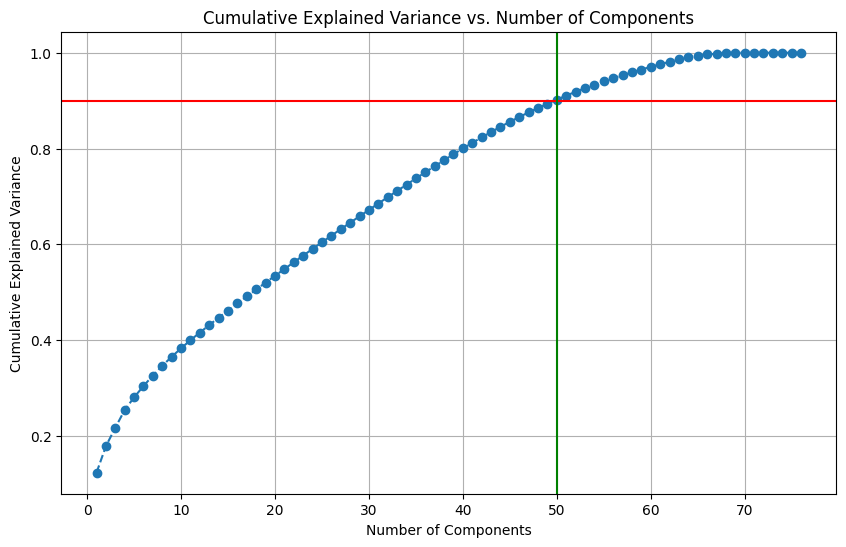

Number of components required to capture 90.0% variance: 50


In [173]:
# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

# Draw a line at the target variance (e.g., 90%)
target_variance = 0.90
plt.axhline(y=target_variance, color='r', linestyle='-')
plt.axvline(x=np.argmax(cumulative_variance >= target_variance) + 1, color='g', linestyle='-')
plt.show()

# Find the number of components needed to reach the target variance
optimal_components = np.argmax(cumulative_variance >= target_variance) + 1
print(f"Number of components required to capture {target_variance*100}% variance: {optimal_components}")

## Summary Interpretation:
1. **Gradual Increase in Explained Variance** - From the plot, the first few components capture only a small portion of the variance (e.g., PC1 to PC10 account for ~40%). This suggests that the dataset does not have very strong dominant directions of variance—instead, the information is spread across many dimensions.

2. **Steady Climb Toward 90% Variance** - As more components are added, the cumulative variance increases smoothly, showing that each component still carries meaningful information. There is no sharp “elbow,” meaning no small set of components captures most of the data structure. This indicates the dataset is highly multidimensional.

3. **90% Variance Achieved at 50 Components** - The intersection of the green vertical line and the red horizontal line shows that it takes 50 principal components to capture 90% of the total variance. 

### **This means:**
- The original 76-dimensional dataset can be reduced to 50 dimensions while keeping almost all (90%) of the information.
- Although 50 components may seem high, this is still a 34% reduction in dimensionality (76 → 50).
- No small set of PCs (<20) captures most of the information.


## 8.1.2 Applying the Final Transformation
After determining the optimal count, the final PCA transformation was applied to the standardized data.

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# --- Applying PCA with 50 components ---
# 50 components were determined to retain 90% of the total variance.
pca_final = PCA(n_components=50) 

# Transform the scaled data
'''
fit calculates the optimal 50 directions (vectors) that capture the most variance. 
transform projects every one of 41,544 households onto these 50 new axes.
'''
X_pca_array = pca_final.fit_transform(X_scaled)



# Create column names (PC1, PC2, ..., PC50)
'''
These are no longer "Income" or "Age"; 
they are abstract mathematical dimensions that are uncorrelated with each other.
'''
pca_columns = [f'PC{i+1}' for i in range(X_pca_array.shape[1])]




# Create the final DataFrame X_pca, which is ready for clustering
'''
Each component is a mix of the original 76 features, representing distinct dimensions of household differences.
'''
X_pca = pd.DataFrame(
    X_pca_array, 
    columns=pca_columns,
    index=X_scaled.index
)



print("✅ Final PCA Transformation (76 features -> 50 components) Complete.")
print(f"Final Feature Matrix shape: {X_pca.shape}")
print("-" * 35)
print("Preview of PCA Data:")
print(X_pca.head())

✅ Final PCA Transformation (76 features -> 50 components) Complete.
Final Feature Matrix shape: (41544, 50)
-----------------------------------
Preview of PCA Data:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.332977 -1.385241 -0.686494 -0.259792 -1.156450  1.514849 -2.470433   
1  0.808443  1.293656  0.993817 -0.040292 -2.201663  2.012406  0.288065   
2 -2.282399  1.859717 -0.361521  0.211578 -0.899310  1.014226  0.281759   
3 -1.945343  1.016501  0.380191 -0.089148 -1.113201  1.089968  0.228498   
4 -0.161064  0.490885  0.403271  0.458023 -1.760578  1.798491  0.110030   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  2.117751 -3.068976  0.312998 -1.045068  0.484560  0.726026  0.111434   
1  0.831304 -1.050663  0.026676  0.651885 -0.073433  0.872187 -0.846254   
2 -1.246530 -1.393634  1.728094  1.408023  0.298728  0.199287 -0.820981   
3 -0.847627 -1.300147  1.540292  1.230304 -0.218747  0.108786 -0.631621   
4  0.4474

- successfully reduced the complexity of the data by over a third, creating a robust, optimized feature matrix (X_pca) ready for the next step: finding the optimal number of clusters ($K$).

---
## 8.2 Determining the Optimal Number of Clusters ($K$) (Hyperparameter Tuning)
K-Means is an unsupervised algorithm, meaning it requires to specify the number of groups ($K$) beforehand (test a range of possibilities (from $K=2$ to $K=15$)). It is a must to use analytical methods to find the best natural grouping in your data.

- Elbow Method (WCSS) - Measures Intra-cluster Cohesion (how tight the clusters are). WCSS (Within-Cluster Sum of Squares) is the sum of squared distances from all points to their assigned cluster centroid.

- Silhouette Score - Measures Inter-cluster Separation and Intra-cluster Cohesion simultaneously.

In [175]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings

# Suppress warnings that may occur during the loop
warnings.filterwarnings('ignore')

# Set a range for K (start at 2, as K-Means requires at least 2 clusters)
K_range = range(2, 16)
wcss = []  # To store Within-Cluster Sum of Squares (WCSS) for the Elbow Method
silhouette_scores = [] # To store the Silhouette Score

for k in K_range:
    # Initialize and fit the K-Means model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    
    # 1. Record WCSS (Inertia)
    wcss.append(kmeans.inertia_)
    
    # 2. Record Silhouette Score
    # Note: Requires more than 1 sample per cluster, which is why we start range at 2
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)
    
    print(f"K={k}: WCSS={kmeans.inertia_:.2f}, Silhouette Score={score:.4f}")

# --- You will now plot the results ---

K=2: WCSS=2607685.68, Silhouette Score=0.1832
K=3: WCSS=2499259.06, Silhouette Score=0.0805
K=4: WCSS=2423460.70, Silhouette Score=0.0726
K=5: WCSS=2367917.82, Silhouette Score=0.0406
K=6: WCSS=2304254.73, Silhouette Score=0.0396
K=7: WCSS=2264255.02, Silhouette Score=0.0533
K=8: WCSS=2228494.33, Silhouette Score=0.0442
K=9: WCSS=2189757.22, Silhouette Score=0.0520
K=10: WCSS=2163683.43, Silhouette Score=0.0545
K=11: WCSS=2120036.51, Silhouette Score=0.0544
K=12: WCSS=2082183.51, Silhouette Score=0.0565
K=13: WCSS=2070814.38, Silhouette Score=0.0787
K=14: WCSS=2041447.29, Silhouette Score=0.0871
K=15: WCSS=1991432.92, Silhouette Score=0.0672


---
# 8.3 Final Model Training